In [4]:
import os

os.chdir("..")

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
df_hydro = pd.read_csv("swed_hydro_msi_2.csv", index_col=0)
df_swinv2_imagenet = pd.read_csv("swed_swinv2_imagenet_msi_2.csv", index_col=0)

In [ ]:
# Calculate means and standard deviations for df_hydro
pivot_hydro = df_hydro.pivot_table(
    values="test_OverallIoU", index="train_fraction", aggfunc=[np.mean, np.std]
)
results_hydro_xs = pivot_hydro.index.values.squeeze()
results_hydro_means = pivot_hydro["mean"].values.squeeze()
results_hydro_stds = pivot_hydro["std"].values.squeeze()

# Calculate means and standard deviations for df_swinv2_imagenet
pivot_swinv2_imagenet = df_swinv2_imagenet.pivot_table(
    values="test_OverallIoU", index="train_fraction", aggfunc=[np.mean, np.std]
)
results_swinv2_imagenet_xs = pivot_swinv2_imagenet.index.values.squeeze()
results_swinv2_imagenet_means = pivot_swinv2_imagenet["mean"].values.squeeze()
results_swinv2_imagenet_stds = pivot_swinv2_imagenet["std"].values.squeeze()

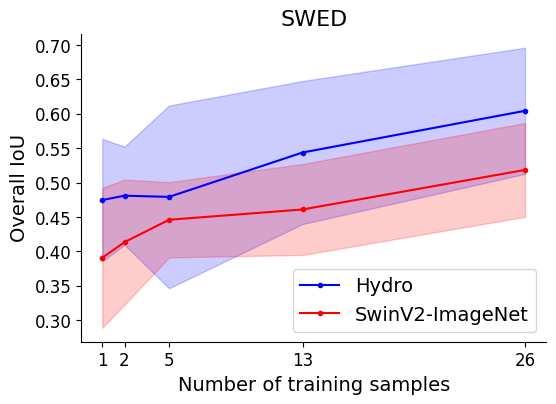

In [36]:
plt.figure(figsize=(6, 4))
ax = plt.gca()

plt.plot(results_hydro_xs, results_hydro_means, marker=".", label="Hydro", color="blue")
plt.fill_between(
    results_hydro_xs,
    results_hydro_means - results_hydro_stds,
    results_hydro_means + results_hydro_stds,
    color="blue",
    alpha=0.2,
)

plt.plot(
    results_swinv2_imagenet_xs,
    results_swinv2_imagenet_means,
    marker=".",
    label="SwinV2-ImageNet",
    color="red",
)
plt.fill_between(
    results_swinv2_imagenet_xs,
    results_swinv2_imagenet_means - results_swinv2_imagenet_stds,
    results_swinv2_imagenet_means + results_swinv2_imagenet_stds,
    color="red",
    alpha=0.2,
)

plt.xlabel("Number of training samples", fontsize=14)
plt.ylabel("Overall IoU", fontsize=14)
plt.xticks(results_hydro_xs, [1, 2, 5, 13, 26], fontsize=12)
plt.yticks(fontsize=12)

plt.title("SWED", fontsize=16)
plt.legend(fontsize=14)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.show()
plt.close()